## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 딥러닝을 위한 함수들
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam # 옵티마이저 설정을 위해서

* 데이터 프레임 관련 라이브러리

### **나.  학습데이터 불러오기**

In [256]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/kmong/url_detective/data/train_dataset.csv')

In [258]:
data.head()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign


### **다.  데이터 전처리**

In [ ]:
# # 중복데이터 제거
# drop_cols = ['url_hostname_len']
# data.drop(columns = drop_cols, inplace = True)

In [259]:
# 텍스트 -> 1, -1 대체
data = data.replace('benign',1)
data = data.replace('malicious',-1)

In [8]:
# # 전처리
# data["url_path_len"].fillna('', inplace=True)
# data["url_domain_len"].fillna('', inplace=True)

In [260]:
data = data.dropna()

In [164]:
# drop_cols =  ['url_len',"html_num_tags('head')","html_num_tags('iframe')",'url_path_len','url_port','url_chinese_present','url_ip_present']
#               #,'html_num_tags(\'embed\')','html_num_tags(\'head\')', 'url_num_dots','url_num_underscores']
# data.drop(columns = drop_cols, inplace = True)

In [261]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3662 non-null   int64  
 1   url_len                  3662 non-null   float64
 2   url_num_hyphens_dom      3662 non-null   float64
 3   url_path_len             3662 non-null   float64
 4   url_domain_len           3662 non-null   float64
 5   url_hostname_len         3662 non-null   float64
 6   url_num_dots             3662 non-null   float64
 7   url_num_underscores      3662 non-null   float64
 8   url_query_len            3662 non-null   float64
 9   url_num_query_para       3662 non-null   float64
 10  url_ip_present           3662 non-null   float64
 11  url_entropy              3662 non-null   float64
 12  url_chinese_present      3662 non-null   float64
 13  url_port                 3662 non-null   float64
 14  html_num_tags('iframe') 

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1


### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [262]:
# 분리

from sklearn.model_selection import train_test_split

target = 'Result_v1'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

feature_name = x.columns

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2022)

In [263]:
# 분리 확인
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2746, 24)
(916, 24)
(2746,)
(916,)


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [264]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [14]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


![confusion_matrix.png](attachment:2d1c1b93-2db6-45e4-91b4-cee7ea6ef268.png)

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)

# import re
# data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [265]:
# 1. import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *
#from sklearn import metrics


In [266]:

model_LR = LinearRegression()
model_Logistic = LogisticRegression()
model_SVC = LinearSVC()
model_KNN = KNeighborsClassifier()
model_DT = DTC()
model_RF = RFC()
model_XGB = XGBClassifier(max_depth = 5, random_state = 2022)
model_LGB = LGBMClassifier(max_depth = 2, random_state = 2022)

In [271]:
# 3. fit(), 학습

model_LR.fit(x_train, y_train)
model_Logistic.fit(x_train, y_train)
model_SVC.fit(x_train, y_train)
model_KNN.fit(x_train, y_train)
model_DT.fit(x_train, y_train)
model_RF.fit(x_train, y_train)
#model_XGB.fit(x_train, y_train)
#model_LGB.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


RandomForestClassifier()

In [272]:
# 4. predict(), 예측

y_pred_LR = model_LR.predict(x_test)
y_pred_Logistic = model_Logistic.predict(x_test)
y_pred_SVC = model_SVC.predict(x_test)
y_pred_KNN = model_KNN.predict(x_test)
y_pred_DT = model_DT.predict(x_test)
y_pred_RF = model_RF.predict(x_test)
#y_pred_XGB = model_XGB.predict(x_test)
#y_pred_LGB = model_LGB.predict(x_test)

In [273]:
# train 및 val 데이터 정확도 확인 
print("Linear Regression 훈련세트 점수: {:.2f}".format( model_LR.score(x_train, y_train) ))
print("Linear Regression 테스트세트 점수: {:.2f}".format( model_LR.score(x_test, y_test) ))
print('\n')

print("LogisticRegression 훈련세트 점수: {:.2f}".format( model_Logistic.score(x_train, y_train) ))
print("LogisticRegression 테스트세트 점수: {:.2f}".format( model_Logistic.score(x_test, y_test) ))
print('\n')

print("SVC 훈련세트 점수: {:.2f}".format( model_SVC.score(x_train, y_train) ))
print("SVC 테스트세트 점수: {:.2f}".format( model_SVC.score(x_test, y_test) ))
print('\n')

print("RF 훈련세트 점수: {:.2f}".format( model_RF.score(x_train, y_train) ))
print("RF 테스트세트 점수: {:.2f}".format( model_RF.score(x_test, y_test) ))
print('\n')

Linear Regression 훈련세트 점수: 0.33
Linear Regression 테스트세트 점수: 0.05


LogisticRegression 훈련세트 점수: 0.82
LogisticRegression 테스트세트 점수: 0.84


SVC 훈련세트 점수: 0.62
SVC 테스트세트 점수: 0.64


RF 훈련세트 점수: 1.00
RF 테스트세트 점수: 0.97




In [226]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

In [227]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시


In [228]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [229]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [230]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

In [231]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

In [232]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)
    
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름

In [233]:
algorithm = RFC
algorithm_name = 'rfc'

    n_estimators  TrainScore  TestScore
0              5      0.9931     0.9443
1             10      0.9971     0.9585
2             15      0.9985     0.9574
3             20      0.9993     0.9618
4             25      0.9996     0.9585
5             30      0.9993     0.9618
6             35      0.9996     0.9596
7             40      0.9996     0.9596
8             45      0.9996     0.9607
9             50      0.9996     0.9607
10            55      0.9996     0.9640
11            60      1.0000     0.9618
12            65      1.0000     0.9607
13            70      1.0000     0.9574
14            75      1.0000     0.9585
15            80      1.0000     0.9596
16            85      1.0000     0.9585
17            90      1.0000     0.9596
18            95      1.0000     0.9629
19           100      1.0000     0.9629
20           105      1.0000     0.9629
21           110      1.0000     0.9629
22           115      1.0000     0.9640
23           120      1.0000     0.9662


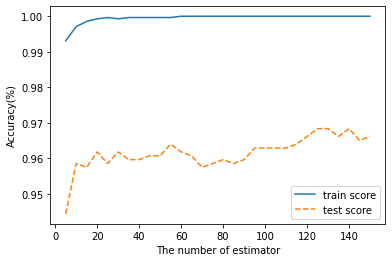

In [277]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [278]:
n_estimator = 125

    depth  TrainScore  TestScore
0       1      0.8751     0.8799
1       2      0.8904     0.8897
2       3      0.9053     0.9017
3       4      0.9173     0.9203
4       5      0.9272     0.9236
5       6      0.9406     0.9269
6       7      0.9534     0.9410
7       8      0.9650     0.9498
8       9      0.9731     0.9520
9      10      0.9800     0.9563
10     11      0.9854     0.9563
11     12      0.9920     0.9683
12     13      0.9960     0.9651
13     14      0.9964     0.9618
14     15      0.9985     0.9651
15     16      0.9985     0.9629
16     17      1.0000     0.9662
17     18      1.0000     0.9651
18     19      1.0000     0.9629
19     20      1.0000     0.9640


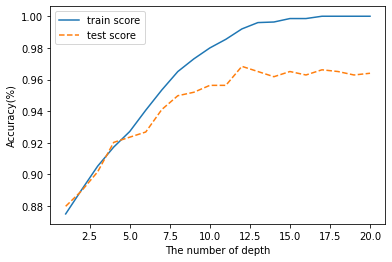

In [279]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [280]:
n_depth = 17

    min_samples_split  TrainScore  TestScore
0                   2      1.0000     0.9662
1                   4      0.9985     0.9662
2                   6      0.9960     0.9618
3                   8      0.9924     0.9640
4                  10      0.9894     0.9662
5                  12      0.9858     0.9651
6                  14      0.9847     0.9618
7                  16      0.9814     0.9574
8                  18      0.9785     0.9574
9                  20      0.9752     0.9596
10                 22      0.9738     0.9563
11                 24      0.9712     0.9531
12                 26      0.9690     0.9531
13                 28      0.9658     0.9531
14                 30      0.9676     0.9498
15                 32      0.9636     0.9476
16                 34      0.9625     0.9541
17                 36      0.9625     0.9498
18                 38      0.9614     0.9476
19                 40      0.9570     0.9487
20                 42      0.9588     0.9476
21        

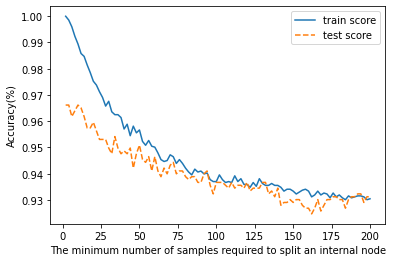

In [281]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [282]:
n_split = 2

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9938     0.9629
1                  4      0.9789     0.9607
2                  6      0.9669     0.9574
3                  8      0.9585     0.9498
4                 10      0.9552     0.9498
5                 12      0.9479     0.9454
6                 14      0.9457     0.9421
7                 16      0.9421     0.9312
8                 18      0.9403     0.9367
9                 20      0.9359     0.9334
10                22      0.9341     0.9323
11                24      0.9334     0.9323
12                26      0.9319     0.9290
13                28      0.9264     0.9258
14                30      0.9297     0.9279
15                32      0.9268     0.9279
16                34      0.9239     0.9247
17                36      0.9217     0.9203
18                38      0.9184     0.9236
19                40      0.9177     0.9192
20                42      0.9155     0.9170
21                44      0.9148

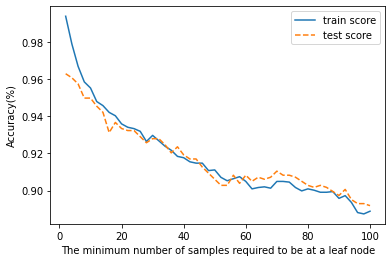

In [283]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [241]:
n_leaf = 2

Accuracy: 0.963
Precision: 0.970
Recall: 0.958
F1-score: 0.964


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2160x2160 with 0 Axes>

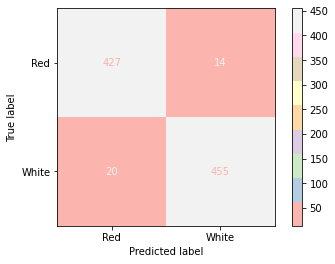

                    Feature  Importance
22       html_num_tags('a')       0.159
3              url_path_len       0.158
21    html_num_tags('form')       0.125
5          url_hostname_len       0.083
15  html_num_tags('script')       0.075
4            url_domain_len       0.073
18     html_num_tags('div')       0.054
2       url_num_hyphens_dom       0.046
6              url_num_dots       0.044
1                   url_len       0.044
11              url_entropy       0.036
8             url_query_len       0.022
7       url_num_underscores       0.019
0                Unnamed: 0       0.018
9        url_num_query_para       0.015
14  html_num_tags('iframe')       0.009
20    html_num_tags('body')       0.008
10           url_ip_present       0.006
17  html_num_tags('object')       0.002
16   html_num_tags('embed')       0.002
19    html_num_tags('head')       0.002
13                 url_port       0.000
12      url_chinese_present       0.000
23  html_num_tags('applet')       0.000


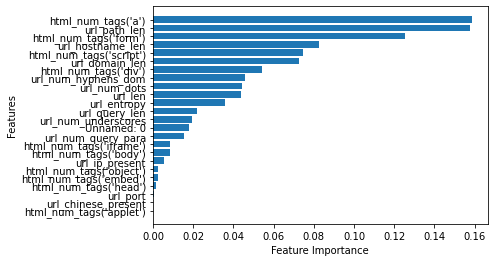

In [288]:
model_final(algorithm, algorithm_name, feature_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

In [284]:
model_RF_2 = RFC(n_estimators=125,max_depth=17,min_samples_split=2,min_samples_leaf=2)

In [285]:
model_RF_2.fit(x_train, y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=2, n_estimators=125)

In [287]:
print("RF_2 훈련세트 점수: {:.2f}".format( model_RF_2.score(x_train, y_train) ))
print("RF_2 테스트세트 점수: {:.2f}".format( model_RF_2.score(x_test, y_test) ))
print('\n')

RF_2 훈련세트 점수: 0.99
RF_2 테스트세트 점수: 0.96




In [96]:
# Test 데이터 결과 Confusion Matrix 확인
# linear regression 은 소수라서 confusion matrix가 작동 안됨

cf_Logistic = confusion_matrix(y_test, y_pred_Logistic)
cf_SCV = confusion_matrix(y_test, y_pred_SVC)
cf_RF = confusion_matrix(y_test, y_pred_RF)



print(cf_Logistic)
print('\n')
print(cf_SCV)
print('\n')
print(cf_RF)
print('\n')


[[212  53]
 [ 39 226]]


[[234  31]
 [ 82 183]]


[[253  12]
 [ 16 249]]




In [ ]:
# Feature(특징)별 가중치 확인
# NB는 단순분류임으로 가중치가 없음 

print("Linear Regression 가중치(계수, 기울기 파라미터 W) :", model_LR.coef_)
print("Linear Regression 편향(절편 파라미터 b) :", model_LR.intercept_)
print('\n')

print("LogisticRegression 가중치(계수, 기울기 파라미터 W) :", model_Logistic.coef_)
print("LogisticRegression 편향(절편 파라미터 b) :", model_Logistic.intercept_)
print('\n')

print("SVC 가중치(계수, 기울기 파라미터 W) :", model_SVC.coef_)
print("SVC 편향(절편 파라미터 b) :", model_SVC.intercept_)
print('\n')

Linear Regression 가중치(계수, 기울기 파라미터 W) : [-6.96849563e-06  2.44955785e-04 -1.98052620e-01 -2.23418365e-02
  2.86993400e-02  1.42754000e-01 -3.14286958e-03 -1.88908025e-01
  1.02128088e-01 -2.04399632e-01 -3.88578059e-16 -1.14523213e-01
 -4.35779854e-02  1.36197429e-02  3.37352802e-01  2.88514481e-01
 -8.15935352e-04 -1.38113583e-01 -3.61003082e-01 -7.05165835e-02
  1.40871781e-03  0.00000000e+00]
Linear Regression 편향(절편 파라미터 b) : 1.7396180962573993


LogisticRegression 가중치(계수, 기울기 파라미터 W) : [[ 5.36545616e-05  5.24309803e-04 -4.33380677e-01 -9.79547898e-02
   1.25450879e-01  4.93303365e-01 -8.92160659e-01 -2.41143016e-02
   5.63585031e-02  3.11057340e-01  0.00000000e+00 -1.35460614e-03
  -2.60166064e-01  5.24441983e-02  5.03221116e-02  7.99018587e-02
  -1.19452423e-03  7.80563129e-02 -1.59805678e-02 -9.67218321e-01
   2.14687772e-02  0.00000000e+00]]
LogisticRegression 편향(절편 파라미터 b) : [0.10890548]


SVC 가중치(계수, 기울기 파라미터 W) : [[-4.03158932e-04 -7.61187716e-04 -1.42568106e-01 -3.22892789e-

In [ ]:
print(classification_report(y_test, y_pred_Logistic))

              precision    recall  f1-score   support

          -1       0.84      0.84      0.84       530
           1       0.85      0.85      0.85       570

    accuracy                           0.84      1100
   macro avg       0.84      0.84      0.84      1100
weighted avg       0.84      0.84      0.84      1100



In [ ]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

          -1       0.58      0.94      0.72       530
           1       0.86      0.36      0.51       570

    accuracy                           0.64      1100
   macro avg       0.72      0.65      0.61      1100
weighted avg       0.73      0.64      0.61      1100



In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

          -1       0.67      0.75      0.71       530
           1       0.74      0.65      0.69       570

    accuracy                           0.70      1100
   macro avg       0.70      0.70      0.70      1100
weighted avg       0.70      0.70      0.70      1100



In [ ]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

          -1       0.91      0.89      0.90       530
           1       0.90      0.92      0.91       570

    accuracy                           0.90      1100
   macro avg       0.90      0.90      0.90      1100
weighted avg       0.90      0.90      0.90      1100



In [97]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

          -1       0.94      0.95      0.95       265
           1       0.95      0.94      0.95       265

    accuracy                           0.95       530
   macro avg       0.95      0.95      0.95       530
weighted avg       0.95      0.95      0.95       530



In [ ]:
#print(classification_report(y_test, y_pred_XGB))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       530
           0       0.00      0.00      0.00         0
           1       0.95      0.95      0.95       570

    accuracy                           0.49      1100
   macro avg       0.32      0.32      0.32      1100
weighted avg       0.49      0.49      0.49      1100



In [ ]:
#print(classification_report(y_test, y_pred_LGB))

NameError: name 'y_pred_LGB' is not defined